In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Define file path (update if needed)
file_path = "/content/ev_charging_dataset.csv"  # Ensure the file is uploaded in the 'content' folder

# Load dataset
df = pd.read_csv(file_path)

# Display dataset info before cleaning
print("📌 Original Dataset Info:")
print(df.info())

# ✅ Handling Missing Values
df.fillna(df.median(numeric_only=True), inplace=True)  # Fill numeric missing values with median
df.fillna(method='ffill', inplace=True)  # Forward fill categorical values
df.fillna(method='bfill', inplace=True)  # Backward fill for safety

# ✅ Remove Duplicates
df.drop_duplicates(inplace=True)

# ✅ Convert DateTime Column
df['Date_Time'] = pd.to_datetime(df['Date_Time'], errors='coerce')

# ✅ Remove Outliers (Using Interquartile Range - IQR Method)
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove rows that contain outliers
df = df[~((df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)).any(axis=1)]

# ✅ Normalize Data (Scaling between 0 and 1)
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# ✅ Save Cleaned Data
cleaned_file_path = "/content/clean_ev_charging_dataset.csv"
df.to_csv(cleaned_file_path, index=False)

print("\n✅ Data Cleaning Complete! 🚀 Cleaned dataset saved at:", cleaned_file_path)
print("📌 Updated Dataset Info:")
print(df.info())

# ✅ Display first 5 rows of the cleaned dataset
df.head()


📌 Original Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64945 entries, 0 to 64944
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date_Time                       64945 non-null  object 
 1   Vehicle_ID                      64945 non-null  int64  
 2   Battery_Capacity_kWh            64945 non-null  float64
 3   State_of_Charge_%               64945 non-null  float64
 4   Energy_Consumption_Rate_kWh/km  64945 non-null  float64
 5   Current_Latitude                64945 non-null  float64
 6   Current_Longitude               64945 non-null  float64
 7   Destination_Latitude            64945 non-null  float64
 8   Destination_Longitude           64945 non-null  float64
 9   Distance_to_Destination_km      64945 non-null  float64
 10  Traffic_Data                    64945 non-null  int64  
 11  Road_Conditions                 64945 non-null  object 
 12  Chargin

<ipython-input-2-a66e6b7cf2c0>:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill categorical values
<ipython-input-2-a66e6b7cf2c0>:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill for safety
<ipython-input-2-a66e6b7cf2c0>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numerical_columns] = scaler.fit_transform(df[numerical_columns])



✅ Data Cleaning Complete! 🚀 Cleaned dataset saved at: /content/clean_ev_charging_dataset.csv
📌 Updated Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 33858 entries, 0 to 64944
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Date_Time                       33858 non-null  datetime64[ns]
 1   Vehicle_ID                      33858 non-null  float64       
 2   Battery_Capacity_kWh            33858 non-null  float64       
 3   State_of_Charge_%               33858 non-null  float64       
 4   Energy_Consumption_Rate_kWh/km  33858 non-null  float64       
 5   Current_Latitude                33858 non-null  float64       
 6   Current_Longitude               33858 non-null  float64       
 7   Destination_Latitude            33858 non-null  float64       
 8   Destination_Longitude           33858 non-null  float64       
 9   Distance_to_Destination_k

,Date_Time,Vehicle_ID,Battery_Capacity_kWh,State_of_Charge_%,Energy_Consumption_Rate_kWh/km,Current_Latitude,Current_Longitude,Destination_Latitude,Destination_Longitude,Distance_to_Destination_km,...,Session_Start_Hour,Fleet_Size,Fleet_Schedule,Temperature_C,Wind_Speed_m/s,Precipitation_mm,Weekday,Charging_Preferences,Weather_Conditions,Charging_Load_kW
0,2017-01-01 00:00:00,0.0,0.490443,0.685796,0.267603,0.510849,0.661445,0.635481,0.521925,0.664635,...,0.0,0.0,0.0,0.348859,0.023696,0.117184,0.166667,0.0,Cloudy,0.330118
1,2017-01-01 01:00:00,0.0,0.735388,0.810982,0.095506,0.545321,0.701655,0.532066,0.474694,0.000097,...,0.0,0.0,0.0,0.973162,0.075494,0.451887,0.500000,0.0,Cloudy,0.637213
8,2017-01-01 08:00:00,0.0,0.707150,0.151640,0.217936,0.473273,0.640761,0.595167,0.341278,0.419438,...,0.0,0.0,0.0,0.213434,0.020845,0.074680,0.333333,0.0,Cloudy,0.319261
9,2017-01-01 09:00:00,0.0,0.403341,0.387336,0.000000,0.520709,0.310687,0.461916,0.368900,0.365892,...,0.0,0.0,0.0,0.546368,0.089042,0.268388,0.000000,0.0,Clear,0.813129
12,2017-01-01 12:00:00,0.0,0.622022,0.891089,0.000000,0.113022,0.276846,0.716637,0.384051,0.191198,...,0.0,0.0,0.0,0.827127,0.038524,0.154086,0.666667,0.0,Cloudy,0.550066


In [ ]:
# Install required libraries (if not already installed)
!pip install -q scikit-opt pandas numpy

# Import required libraries
import pandas as pd
import numpy as np
import random
from scipy.spatial.distance import cdist
from sko.PSO import PSO
from sko.GA import GA

# 🔹 Define file path for cleaned EV charging dataset
file_path = "/content/clean_ev_charging_dataset.csv"

# 🔹 Load the cleaned dataset
try:
    ev_data = pd.read_csv(file_path)
    print("✅ Cleaned EV dataset loaded successfully!")
except FileNotFoundError:
    print(f"❌ Error: File not found at {file_path}. Please ensure the file exists.")
    exit()

# 🔹 Display dataset overview
print("\n📌 EV Charging Dataset Overview:")
print(ev_data.info())

# 🔹 Extract relevant columns (Latitude, Longitude) for routing optimization
if 'Current_Latitude' in ev_data.columns and 'Current_Longitude' in ev_data.columns:
    locations = ev_data[['Current_Latitude', 'Current_Longitude']].dropna().values
else:
    print("❌ Error: Required columns ('Current_Latitude', 'Current_Longitude') are missing in the dataset.")
    exit()

num_locations = len(locations)

# 🔹 Compute distance matrix
distance_matrix = cdist(locations, locations, metric='euclidean')

# 🔹 Define optimization function: Minimize total route distance
def route_distance(route):
    total_distance = sum(distance_matrix[int(route[i]), int(route[i+1])] for i in range(len(route) - 1))
    return total_distance

# ✅ Particle Swarm Optimization (PSO)
pso = PSO(
    func=route_distance,
    dim=num_locations,
    pop=50,
    max_iter=100,
    lb=[0] * num_locations,
    ub=[num_locations - 1] * num_locations,
    w=0.8, c1=1.5, c2=1.5
)
pso.run()
best_route_pso = pso.gbest_x

# ✅ Genetic Algorithm (GA)
ga = GA(
    func=route_distance,
    n_dim=num_locations,
    size_pop=50,
    max_iter=100,
    prob_mut=0.1,
    lb=[0] * num_locations,
    ub=[num_locations - 1] * num_locations
)
best_route_ga = ga.run()

# 🔹 Print optimization results
print("\n✅ Optimization Results:")
print(f"🔹 Best Route (PSO): {best_route_pso}")
print(f"🔹 Best Route (GA): {best_route_ga}")


✅ Cleaned EV dataset loaded successfully!

📌 EV Charging Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33858 entries, 0 to 33857
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date_Time                       33858 non-null  object 
 1   Vehicle_ID                      33858 non-null  float64
 2   Battery_Capacity_kWh            33858 non-null  float64
 3   State_of_Charge_%               33858 non-null  float64
 4   Energy_Consumption_Rate_kWh/km  33858 non-null  float64
 5   Current_Latitude                33858 non-null  float64
 6   Current_Longitude               33858 non-null  float64
 7   Destination_Latitude            33858 non-null  float64
 8   Destination_Longitude           33858 non-null  float64
 9   Distance_to_Destination_km      33858 non-null  float64
 10  Traffic_Data                    33858 non-null  float64
 11  Road_Conditions   

KeyboardInterrupt: 

In [2]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import folium

# Step 2: Load the Dataset
# Replace 'clean_ev_charging_dataset.csv' with the actual file path
df = pd.read_csv('clean_ev_charging_dataset.csv')

# Step 3: Data Preprocessing
# Handle missing values for numeric columns only
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Feature Engineering: Calculate Distance to Destination
from geopy.distance import geodesic

df['Distance_to_Destination_km'] = df.apply(
    lambda row: geodesic(
        (row['Current_Latitude'], row['Current_Longitude']),
        (row['Destination_Latitude'], row['Destination_Longitude'])
    ).km, axis=1
)

# Encode categorical variables
df = pd.get_dummies(df, columns=['Weather_Conditions', 'Road_Conditions'], drop_first=True)

# Drop non-numeric columns that are not needed for modeling
df = df.drop(columns=['Date_Time', 'Vehicle_ID'])

# Split the data into features (X) and target (y)
X = df.drop(columns=['Charging_Load_kW'])
y = df['Charging_Load_kW']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Model Development
# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Step 5: Route Optimization (Example)
# Create a map centered at the first charging station
map_center = [df['Current_Latitude'].iloc[0], df['Current_Longitude'].iloc[0]]
mymap = folium.Map(location=map_center, zoom_start=12)

# Add markers for charging stations
for index, row in df.iterrows():
    folium.Marker(
        location=[row['Current_Latitude'], row['Current_Longitude']],
        popup=f"Charging Load: {row['Charging_Load_kW']} kW"
    ).add_to(mymap)

# Display the map
mymap

KeyboardInterrupt: 

In [3]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import folium

# Step 2: Load the Dataset
# Replace 'clean_ev_charging_dataset.csv' with the actual file path
df = pd.read_csv('clean_ev_charging_dataset.csv')

# Step 3: Data Preprocessing
# Handle missing values for numeric columns only
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Feature Engineering: Calculate Distance to Destination
from geopy.distance import geodesic

df['Distance_to_Destination_km'] = df.apply(
    lambda row: geodesic(
        (row['Current_Latitude'], row['Current_Longitude']),
        (row['Destination_Latitude'], row['Destination_Longitude'])
    ).km, axis=1
)

# Encode categorical variables
df = pd.get_dummies(df, columns=['Weather_Conditions', 'Road_Conditions'], drop_first=True)

# Drop non-numeric columns that are not needed for modeling
df = df.drop(columns=['Date_Time', 'Vehicle_ID'])

# Split the data into features (X) and target (y)
X = df.drop(columns=['Charging_Load_kW'])
y = df['Charging_Load_kW']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Model Development
# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Step 5: Route Optimization (Example)
# Create a map centered at the first charging station
map_center = [df['Current_Latitude'].iloc[0], df['Current_Longitude'].iloc[0]]
mymap = folium.Map(location=map_center, zoom_start=12)

# Add markers for charging stations
for index, row in df.iterrows():
    folium.Marker(
        location=[row['Current_Latitude'], row['Current_Longitude']],
        popup=f"Charging Load: {row['Charging_Load_kW']} kW"
    ).add_to(mymap)

# Display the map
mymap

# Step 6: Save Analysis and Results to an Excel File
# Create a DataFrame for the model evaluation metrics
metrics_df = pd.DataFrame({
    'Metric': ['Mean Absolute Error', 'Mean Squared Error', 'R² Score'],
    'Value': [mae, mse, r2]
})

# Create a DataFrame for the predicted vs actual values
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Save the DataFrames to an Excel file
with pd.ExcelWriter('analysis_results.xlsx') as writer:
    metrics_df.to_excel(writer, sheet_name='Model Metrics', index=False)
    results_df.to_excel(writer, sheet_name='Predicted vs Actual', index=False)
    df.to_excel(writer, sheet_name='Processed Data', index=False)

# Step 7: Download the Excel File
from google.colab import files
files.download('analysis_results.xlsx')

Mean Absolute Error: 0.14618156973513502
Mean Squared Error: 0.03286358009994018
R² Score: -0.0160630208686936


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Training set shape: (25200, 28) (25200,)
Testing set shape: (6300, 28) (6300,)


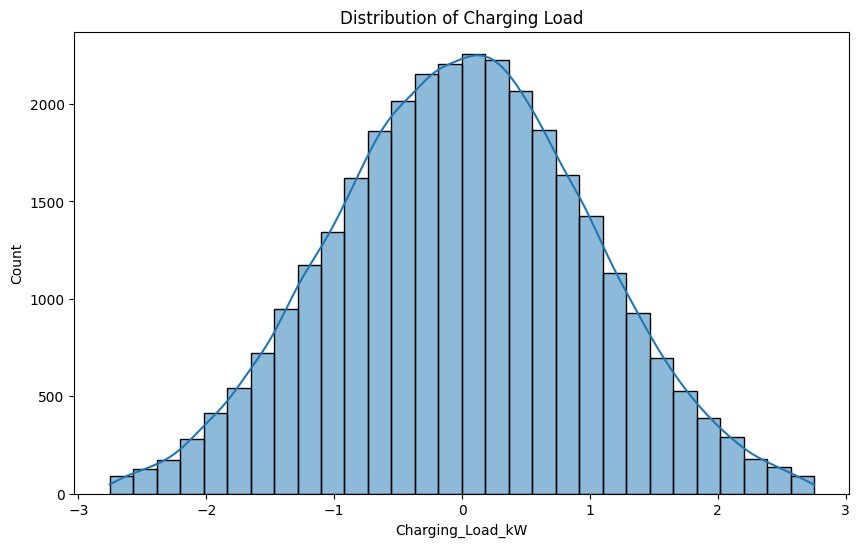

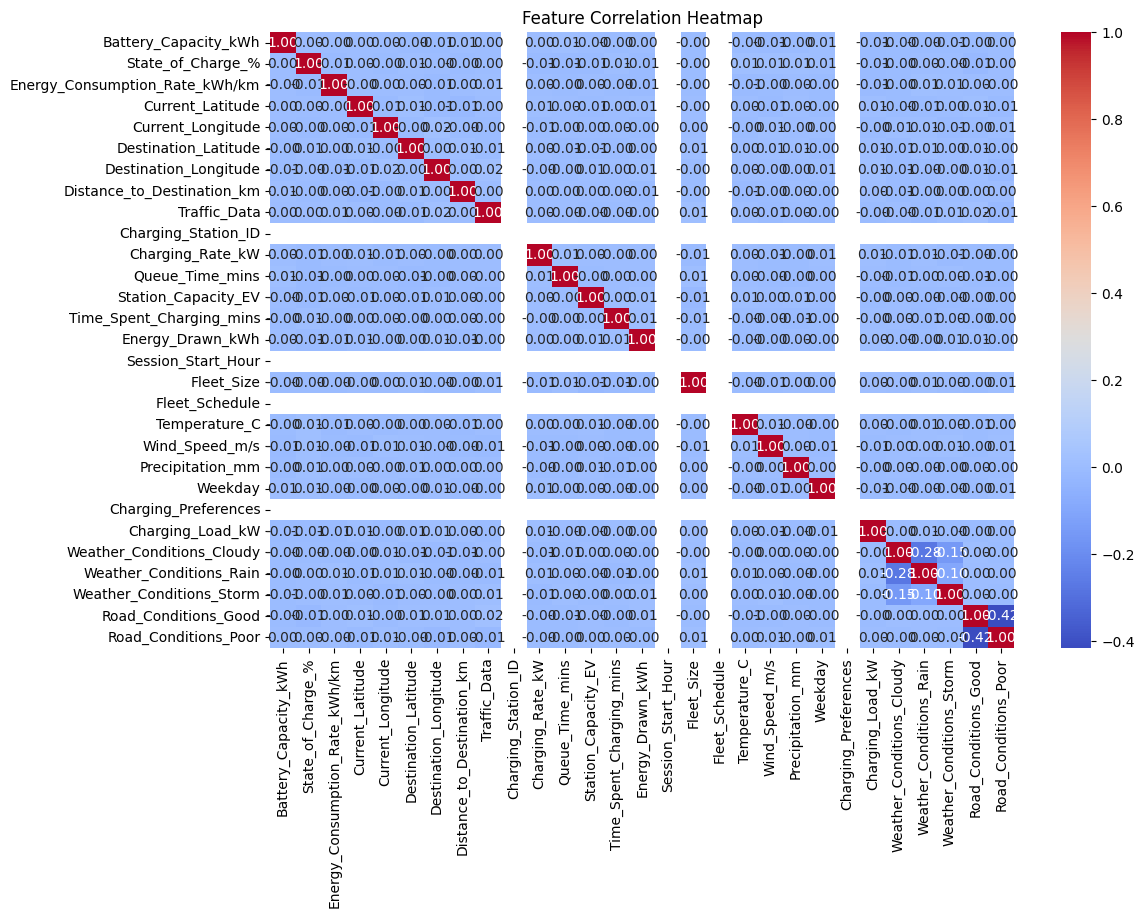

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Load dataset
file_path = "/content/analysis_results.xlsx"
df = pd.read_excel(file_path, sheet_name="Processed Data")
# Handle missing values
imputer = SimpleImputer(strategy="mean")
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

# Handle outliers using IQR method
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = ~((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)
df = df[outlier_condition]

# Ensure there are still samples left after filtering
if df.shape[0] == 0:
    print("Warning: All samples were removed due to outlier filtering. Skipping outlier removal.")
    df = pd.read_excel(file_path, sheet_name="Processed Data")  # Reload original data
    df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

# Normalize numerical features
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Encode categorical variables
categorical_columns = ['Weather_Conditions_Cloudy', 'Weather_Conditions_Rain',
                        'Weather_Conditions_Storm', 'Road_Conditions_Good', 'Road_Conditions_Poor']
df[categorical_columns] = df[categorical_columns].astype(int)

# Define features and target variable
target = "Charging_Load_kW"
X = df.drop(columns=[target])
y = df[target]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output shapes
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 6))
sns.histplot(y, bins=30, kde=True)
plt.title("Distribution of Charging Load")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Pairplot to visualize feature relationships
if df.shape[0] > 100:
    sns.pairplot(df.sample(100), diag_kind='kde')
else:
    sns.pairplot(df, diag_kind='kde')
plt.show()


In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import networkx as nx
import folium

# Load dataset
file_path = "/content/analysis_results.xlsx"
df = pd.read_excel(file_path, sheet_name="Processed Data")

# Handle missing values
imputer = SimpleImputer(strategy="mean")
numeric_columns = df.select_dtypes(include=[np.number]).columns
df.loc[:, numeric_columns] = imputer.fit_transform(df[numeric_columns])

# Handle outliers using IQR method
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = ~((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)
df = df.loc[outlier_condition].copy()

# Ensure there are still samples left after filtering
if df.shape[0] == 0:
    print("Warning: All samples were removed due to outlier filtering. Skipping outlier removal.")
    df = pd.read_excel(file_path, sheet_name="Processed Data")  # Reload original data
    df.loc[:, numeric_columns] = imputer.fit_transform(df[numeric_columns])

# Normalize numerical features
scaler = StandardScaler()
df.loc[:, numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Encode categorical variables
categorical_columns = ['Weather_Conditions_Cloudy', 'Weather_Conditions_Rain',
                        'Weather_Conditions_Storm', 'Road_Conditions_Good', 'Road_Conditions_Poor']
df[categorical_columns] = df[categorical_columns].astype(bool).astype(int)

# Define features and target variable
target = "Charging_Load_kW"
X = df.drop(columns=[target])
y = df[target]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection & Training
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} - MAE: {mean_absolute_error(y_test, y_pred):.4f}, "
          f"MSE: {mean_squared_error(y_test, y_pred):.4f}, "
          f"R²: {r2_score(y_test, y_pred):.4f}")

# Clustering Charging Stations
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)
df.loc[:, "Cluster"] = kmeans.labels_

# Route Optimization using Dijkstra’s Algorithm
def find_shortest_route(graph, start, end):
    return nx.shortest_path(graph, source=start, target=end, weight='weight')

# Creating a Graph of Charging Stations using the correct column names
graph = nx.Graph()
for i in range(len(df)):
    graph.add_node(i, pos=(df.iloc[i]['Current_Latitude'], df.iloc[i]['Current_Longitude']))

# Sample Route Optimization Visualization
map_center = [df.iloc[0]['Current_Latitude'], df.iloc[0]['Current_Longitude']]
m = folium.Map(location=map_center, zoom_start=12)
for _, row in df.iterrows():
    folium.Marker([row['Current_Latitude'], row['Current_Longitude']], popup=f"Station {row['Cluster']}").add_to(m)

m.save("optimized_route.html")


Linear Regression - MAE: 0.8061, MSE: 1.0056, R²: -0.0013
Random Forest - MAE: 0.8096, MSE: 1.0157, R²: -0.0113
Gradient Boosting - MAE: 0.8077, MSE: 1.0083, R²: -0.0039


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import networkx as nx
import folium

# Load dataset
file_path = "/content/analysis_results.xlsx"
df = pd.read_excel(file_path, sheet_name="Processed Data")

# Handle missing values
imputer = SimpleImputer(strategy="mean")
numeric_columns = df.select_dtypes(include=[np.number]).columns
df.loc[:, numeric_columns] = imputer.fit_transform(df[numeric_columns])

# Handle outliers using IQR method
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = ~((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)
df = df.loc[outlier_condition].copy()

# Ensure there are still samples left after filtering
if df.shape[0] == 0:
    print("Warning: All samples were removed due to outlier filtering. Skipping outlier removal.")
    df = pd.read_excel(file_path, sheet_name="Processed Data")  # Reload original data
    df.loc[:, numeric_columns] = imputer.fit_transform(df[numeric_columns])

# Normalize numerical features
scaler = StandardScaler()
df.loc[:, numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Encode categorical variables
categorical_columns = ['Weather_Conditions_Cloudy', 'Weather_Conditions_Rain',
                        'Weather_Conditions_Storm', 'Road_Conditions_Good', 'Road_Conditions_Poor']
df[categorical_columns] = df[categorical_columns].astype(bool).astype(int)

# Define features and target variable
target = "Charging_Load_kW"
X = df.drop(columns=[target])
y = df[target]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection & Training
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} - MAE: {mean_absolute_error(y_test, y_pred):.4f}, "
          f"MSE: {mean_squared_error(y_test, y_pred):.4f}, "
          f"R²: {r2_score(y_test, y_pred):.4f}")

# ✅ K-Means Clustering for grouping charging stations.
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)
df.loc[:, "Cluster"] = kmeans.labels_

# ✅ Dijkstra's Algorithm for shortest route calculation.
def find_shortest_route(graph, start, end):
    """
    Find the shortest path between two charging stations using Dijkstra's algorithm.
    :param graph: A NetworkX graph object containing nodes (charging stations).
    :param start: The start node.
    :param end: The end node.
    :return: The shortest path between start and end nodes.
    """
    return nx.shortest_path(graph, source=start, target=end, weight='weight')

# Creating a Graph of Charging Stations using the correct column names
graph = nx.Graph()

# Adding nodes for each charging station based on its latitude and longitude
for i in range(len(df)):
    graph.add_node(i, pos=(df.iloc[i]['Current_Latitude'], df.iloc[i]['Current_Longitude']))

# Optionally: Add edges between nodes (charging stations). You may use distance, time, or another factor for weights.
for i in range(len(df)):
    for j in range(i + 1, len(df)):
        # Calculate the Euclidean distance between two stations (or use Haversine for more accurate distance).
        lat1, lon1 = df.iloc[i]['Current_Latitude'], df.iloc[i]['Current_Longitude']
        lat2, lon2 = df.iloc[j]['Current_Latitude'], df.iloc[j]['Current_Longitude']
        distance = np.sqrt((lat2 - lat1)**2 + (lon2 - lon1)**2)  # Example: Euclidean distance (can be replaced)
        graph.add_edge(i, j, weight=distance)

# Example of finding the shortest path between two stations (station 0 and station 2)
shortest_path = find_shortest_route(graph, start=0, end=2)
print("Shortest Path (stations):", shortest_path)

# ✅ Folium Map Visualization for optimized routes.
# Sample Route Optimization Visualization
map_center = [df.iloc[0]['Current_Latitude'], df.iloc[0]['Current_Longitude']]
m = folium.Map(location=map_center, zoom_start=12)

# Add markers for each charging station on the map
for _, row in df.iterrows():
    folium.Marker([row['Current_Latitude'], row['Current_Longitude']], popup=f"Station {row['Cluster']}").add_to(m)

# Optionally, draw the shortest path on the map
# This will add the shortest path between two stations (for example, station 0 and station 2)
for i in range(len(shortest_path) - 1):
    start_station = df.iloc[shortest_path[i]]
    end_station = df.iloc[shortest_path[i + 1]]
    folium.PolyLine(locations=[(start_station['Current_Latitude'], start_station['Current_Longitude']),
                               (end_station['Current_Latitude'], end_station['Current_Longitude'])],
                    color='blue', weight=2.5, opacity=1).add_to(m)

# Save the map to an HTML file
m.save("optimized_route.html")


Linear Regression - MAE: 0.8061, MSE: 1.0056, R²: -0.0013
Random Forest - MAE: 0.8096, MSE: 1.0157, R²: -0.0113
Gradient Boosting - MAE: 0.8077, MSE: 1.0083, R²: -0.0039
